In [1]:
from urllib.request import urlretrieve
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn as sk
%matplotlib inline 

In [2]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
urlretrieve(medical_charges_url, 'medical.csv')
medical_df = pd.read_csv('medical.csv')

In [3]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
medical_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['font.size'] = 14

In [ ]:
medical_df['age'].describe()

In [ ]:
# fig = px.histogram(medical_df, 
#                     x='age', 
#                     marginal='box',
#                     nbins=47,
#                     title='Age Distribution')
# fig.update_layout(bargap=0.1)
# fig.show()

plt.hist(medical_df['age'], bins=47)
# plt.xlabel('Age')
# plt.title('Age Distribution');

In [ ]:
plt.hist(medical_df['bmi'],bins=47)
plt.xlabel('BMI')
plt.title('BMI Distribution');

In [ ]:
# plt.hist(medical_df['charges'], medical_df['smoker'])
sns.scatterplot(x='charges', y='smoker', data=medical_df)
plt.xlabel('Charges')
plt.ylabel('Smoker')
plt.title('Charges by Smoker');

In [ ]:
medical_df['smoker'].value_counts()

In [ ]:
# # plt.hist(medical_df['smoker'], medical_df['sex']);
# px.histogram(medical_df, x='smoker', color='sex')

In [ ]:
# px.scatter(medical_df, 
#                     x='age', y='charges', 
#                     color='smoker', 
#                     opacity=0.8, 
#                     hover_data = ['sex'], 
#                     title='Age vs Charges')
# # fig.update_traces(marker_size=5)
# # fig.show()

In [ ]:
# px.scatter(medical_df, 
#                     x='bmi', y='charges', 
#                     color='smoker', 
#                     opacity=0.8, 
#                     hover_data = ['sex'], 
#                     title='BMI vs Charges')

In [ ]:
# px.violin(medical_df, x='children', y='charges')

In [ ]:
medical_df.corr()

In [ ]:
sns.heatmap(medical_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

In [ ]:
non_smoker_df = medical_df[medical_df['smoker']=='no']

In [ ]:
sns.scatterplot(x='age', y='charges',
data=medical_df, 
alpha=0.7, s=15);

In [ ]:
def estimate_charges(age, w, b):
    return w * age + b

In [ ]:
w = 50
b = 100

In [ ]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

In [ ]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

In [ ]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [26]:
from sklearn.linear_model import LinearRegression
# from LinearRegression import coef_, intercept_
# from sklearn.linear_model.LinearRegression import coef_
from sklearn.metrics import mean_squared_error as rmse
model = LinearRegression()

In [ ]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df['charges']
print("I/P Shape", inputs.shape)
print("Target Shape", targets.shape)

In [ ]:
model.fit(inputs, targets)

In [ ]:
model.predict(np.array([[23], 
                        [37], 
                        [61]]))

In [ ]:
inputs

In [ ]:
predictions = model.predict(inputs)
predictions

In [ ]:
rmse(targets, predictions)

In [ ]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

In [ ]:
# px.scatter(non_smoker_df, x='bmi', y='charges')
# fig.update_traces(marker_size=5)
# fig.show()

plt.scatter(data=non_smoker_df, 
            x='bmi', y='charges')
plt.title('BMI vs Chrages')
plt.figure(figsize=(20, 12));

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(data=non_smoker_df, 
xs='age', ys='bmi', zs='charges');

In [ ]:
non_smoker_df['charges'].corr(non_smoker_df['children'])

In [ ]:
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']
model1= LinearRegression()
model1.fit(inputs, targets)
predictions = model1.predict(inputs)

loss = rmse(targets, predictions)
print("LOss: ", loss)


<AxesSubplot:xlabel='smoker', ylabel='charges'>

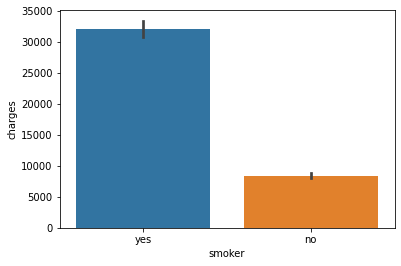

In [6]:
sns.barplot(data=medical_df, x='smoker', y='charges')

In [10]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_codes'] = medical_df['smoker'].map(smoker_codes)

In [12]:
sex_codes = {'female': 0, 'male': 1}
medical_df['sex_codes'] = medical_df['sex'].map(sex_codes)

In [13]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_codes,sex_codes
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [14]:
medical_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [18]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [19]:
one_ht = enc.transform(medical_df[['region']]).toarray()
one_ht

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [21]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_ht

In [22]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_codes,sex_codes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [27]:
inputs_col= ['age', 'bmi', 'children', 'smoker_codes', 'sex_codes', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[inputs_col], medical_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  36501893.00741544
